In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X_with_const = add_constant(X)  # Añadir una constante para VIF
vif = pd.DataFrame()
vif["Variable"] = X_with_const.columns
vif["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif)


         Variable        VIF
0           const  35.352347
1     priceByArea   1.446939
2            size   2.382589
3       bathrooms   1.744447
4    ParkingSpace   1.578872
5         hasLift   1.398631
6           rooms   1.700275
7           floor   1.048010
8        exterior   1.140792
9  newDevelopment   1.379536


In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Cargar datos
df = pd.read_excel("BBDD serrano limpia.xlsx")
#  Seleccionar las variables
numerical_features = features =  ['priceByArea','size', 'bathrooms','ParkingSpace','hasLift', 'rooms','floor', 'exterior', 'Property  type Binaria','colegios','Distancia al hospital','Distancia C.C']
categorical_features = ['district', 'neighborhood']

# Codificar variables categóricas
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Definir X e y
X = df[numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df['price']

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Entrenar el modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#  Predicciones
y_pred = rf_model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f" Evaluación del Modelo Random Forest:")
print(f"MAE  (Error Absoluto Medio): {mae:.2f}")
print(f"MSE  (Error Cuadrático Medio): {mse:.2f}")
print(f"RMSE (Raíz del MSE): {rmse:.2f}")
print(f"R²   (Coeficiente de Determinación): {r2:.4f}")


 Evaluación del Modelo Random Forest:
MAE  (Error Absoluto Medio): 5363.05
MSE  (Error Cuadrático Medio): 82075456.13
RMSE (Raíz del MSE): 9059.55
R²   (Coeficiente de Determinación): 0.9937


In [ ]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Evaluación en entrenamiento
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluación en prueba
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(" Rendimiento en Entrenamiento:")
print(f"   - MAE: {train_mae:.2f}")
print(f"   - RMSE: {train_rmse:.2f}")
print(f"   - R²: {train_r2:.4f}")

print("\n Rendimiento en Prueba:")
print(f"   - MAE: {test_mae:.2f}")
print(f"   - RMSE: {test_rmse:.2f}")
print(f"   - R²: {test_r2:.4f}")


🔹 Rendimiento en Entrenamiento:
   - MAE: 4.25
   - RMSE: 26.48
   - R²: 1.0000

🔹 Rendimiento en Prueba:
   - MAE: 5363.05
   - RMSE: 9059.55
   - R²: 0.9937


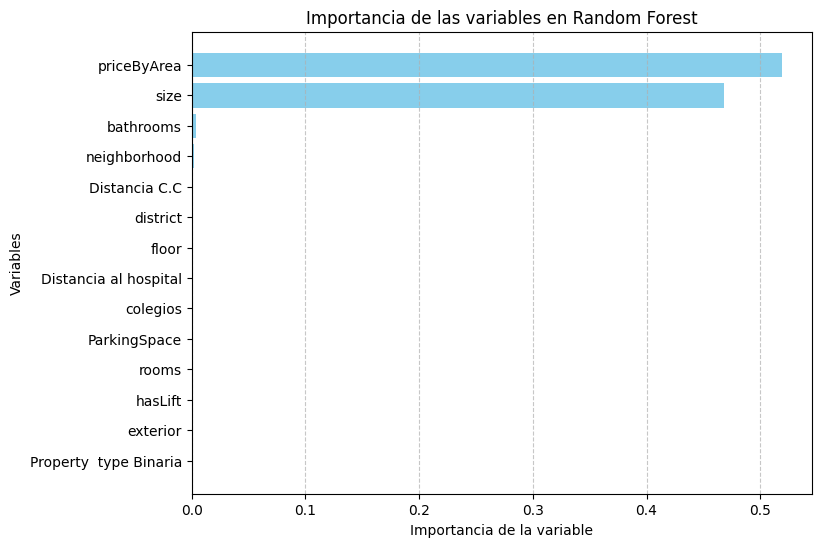

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import defaultdict

# Cargar datos
df = pd.read_excel("BBDD serrano limpia.xlsx")

# Seleccionar variables numéricas (excluyendo 'priceByArea')
numerical_features = ['priceByArea','size', 'bathrooms','ParkingSpace','hasLift', 'rooms','floor', 'exterior', 'Property  type Binaria','colegios','Distancia al hospital','Distancia C.C']
categorical_features = ['district', 'neighborhood']

# Codificar variables categóricas
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Definir X e y
X = df[numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Agrupar importancia de variables por categoría
importances = model.feature_importances_
feature_names = X.columns
importance_dict = defaultdict(float)

for feature, importance in zip(feature_names, importances):
    base_feature = feature.split('_')[0]  # Agrupar por nombre base
    importance_dict[base_feature] += importance

# Ordenar importancia total
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1])
labels, values = zip(*sorted_importances)

# Gráfico de importancia de variables
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Importancia de la variable")
plt.ylabel("Variables")
plt.title("Importancia de las variables en Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar datos
df = pd.read_excel("BBDD serrano limpia.xlsx")

# Seleccionar variables numéricas
numerical_features =features = [ 'priceByArea', 'size', 'bathrooms','ParkingSpace','hasLift', 'rooms','floor', 'exterior', 'Property  type Binaria','colegios','Distancia al hospital','Distancia C.C']
X = df[numerical_features]
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Resultados
print("Coeficientes:", model.coef_)
print("Intercepto:", model.intercept_)
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)


Coeficientes: [   65.32326934  2453.34120095  4063.69457373 12690.97972374
 10554.09476155  9624.69173938  -663.80907126 26171.93850803
  8653.79067093  2222.64934964  3535.93157694 -6556.69828788]
Intercepto: -225538.66474464227
MAE: 23540.057517073652
RMSE: 33220.69804889604
R^2: 0.9159014583878691


Ecuación del modelo: price = -225538.66 + (65.32 * priceByArea) + (2453.34 * size) + (4063.69 * bathrooms) + (12690.98 * ParkingSpace) + (10554.09 * hasLift) + (9624.69 * rooms) + (-663.81 * floor) + (26171.94 * exterior) + (8653.79 * Property  type Binaria) + (2222.65 * colegios) + (3535.93 * Distancia al hospital) + (-6556.70 * Distancia C.C)


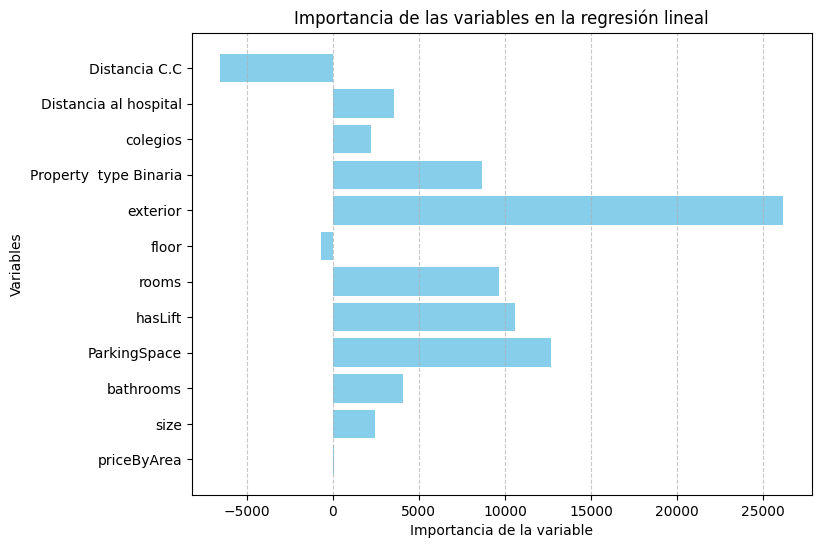

In [4]:
import matplotlib.pyplot as plt
# Imprimir ecuación del modelo
equation = "price = {:.2f}".format(model.intercept_)
for coef, feature in zip(model.coef_, numerical_features):
    equation += " + ({:.2f} * {})".format(coef, feature)
print("Ecuación del modelo:", equation)

# Gráfico de importancia de variables
plt.figure(figsize=(8, 6))
plt.barh(numerical_features, model.coef_, color='skyblue')
plt.xlabel("Importancia de la variable")
plt.ylabel("Variables")
plt.title("Importancia de las variables en la regresión lineal")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# Evaluación en entrenamiento
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# Comparación de R^2
print("R^2 en entrenamiento:", r2_train)
print("R^2 en prueba:", r2)
print("MAE en entrenamiento:", mean_absolute_error(y_train, y_train_pred))
print("MAE en prueba:", mean_absolute_error(y_test, y_pred))
print("RMSE en entrenamiento:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("RMSE en prueba:", np.sqrt(mean_squared_error(y_test, y_pred)))


R^2 en entrenamiento: 0.9023635610010659
R^2 en prueba: 0.9159014583878691
MAE en entrenamiento: 23131.355717736078
MAE en prueba: 23540.057517073652
RMSE en entrenamiento: 37125.763218231354
RMSE en prueba: 33220.69804889604


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


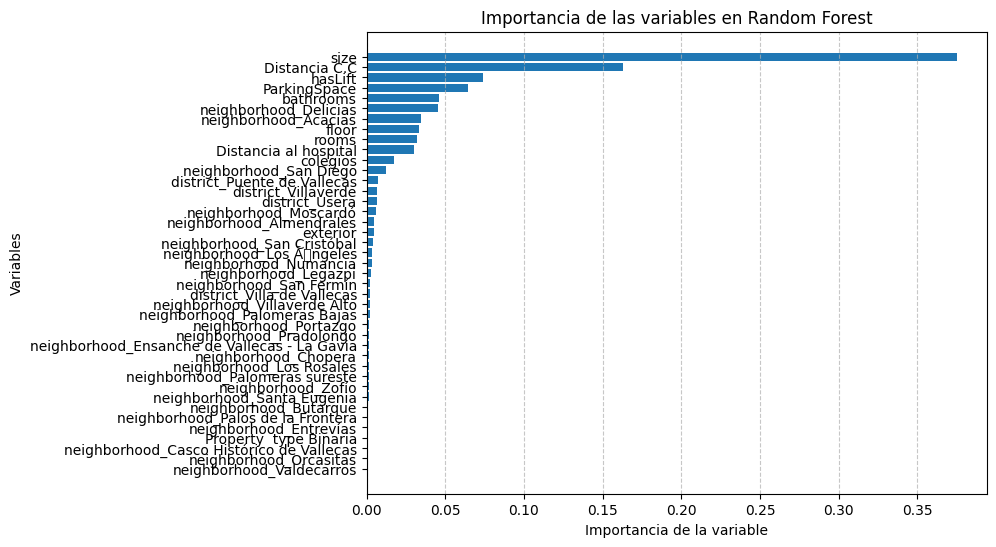

MAE: 41076.661180509414
RMSE: 59434.00818309384
R^2: 0.7308211109305164


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar datos
df = pd.read_excel("BBDD serrano limpia.xlsx")

# Seleccionar variables numéricas (excluyendo 'priceByArea')
numerical_features = features =  ['size', 'bathrooms','ParkingSpace','hasLift', 'rooms','floor', 'exterior', 'Property  type Binaria','colegios','Distancia al hospital','Distancia C.C']
categorical_features = ['district', 'neighborhood']

# Codificar variables categóricas
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Definir X e y
X = df[numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Gráfico de importancia de variables
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), np.array(feature_names)[sorted_indices])
plt.xlabel("Importancia de la variable")
plt.ylabel("Variables")
plt.title("Importancia de las variables en Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Resultados
print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)


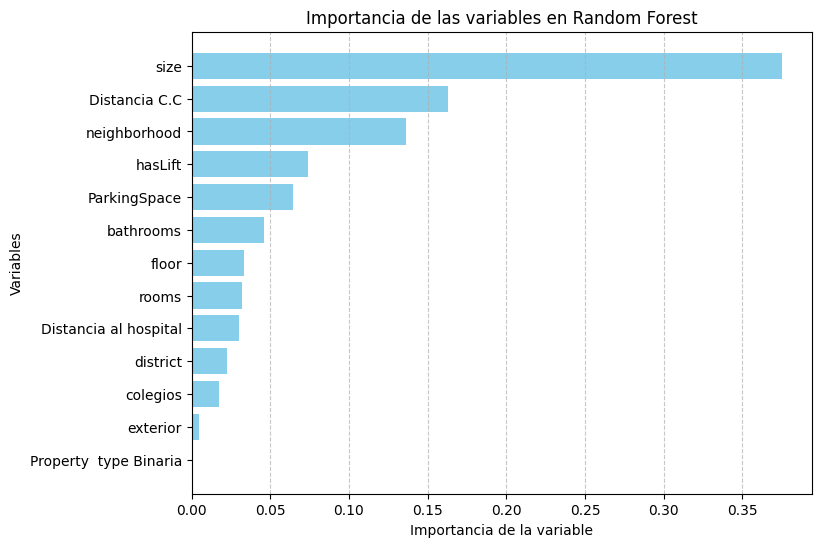

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import defaultdict

# Cargar datos
df = pd.read_excel("BBDD serrano limpia.xlsx")

# Seleccionar variables numéricas (excluyendo 'priceByArea')
numerical_features = ['size', 'bathrooms','ParkingSpace','hasLift', 'rooms','floor', 'exterior', 'Property  type Binaria','colegios','Distancia al hospital','Distancia C.C']
categorical_features = ['district', 'neighborhood']

# Codificar variables categóricas
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Definir X e y
X = df[numerical_features + [col for col in df.columns if col.startswith(tuple(categorical_features))]]
y = df['price']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Agrupar importancia de variables por categoría
importances = model.feature_importances_
feature_names = X.columns
importance_dict = defaultdict(float)

for feature, importance in zip(feature_names, importances):
    base_feature = feature.split('_')[0]  # Agrupar por nombre base
    importance_dict[base_feature] += importance

# Ordenar importancia total
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1])
labels, values = zip(*sorted_importances)

# Gráfico de importancia de variables
plt.figure(figsize=(8, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Importancia de la variable")
plt.ylabel("Variables")
plt.title("Importancia de las variables en Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para la búsqueda en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Máximo de características consideradas
    'bootstrap': [True, False]  # Si se hace muestreo con reemplazo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MAE: 21752.939298018944
RMSE: 32631.44530162984
R^2: 0.9188583982220104



Métricas de Evaluación:
Entrenamiento - MAE: 7.250022653721525
Entrenamiento - RMSE: 60.50189617687931
Entrenamiento - R²: 0.9999997407020266
Prueba - MAE: 21752.939298018944
Prueba - RMSE: 32631.44530162984
Prueba - R²: 0.9188583982220104


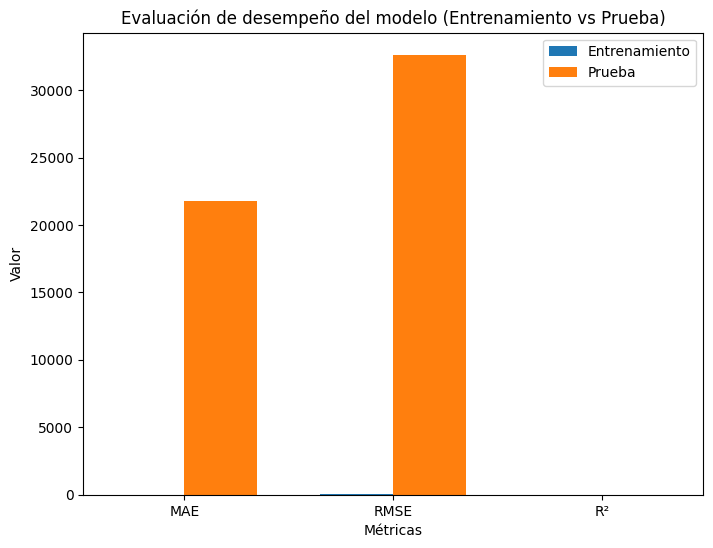


**Parece haber Overfitting. El modelo tiene un rendimiento significativamente mejor en los datos de entrenamiento que en los de prueba.**


In [ ]:
# Evaluar el mejor modelo
best_model = grid_search.best_estimator_

# Predicciones en los datos de entrenamiento
y_train_pred = best_model.predict(X_train)
# Predicciones en los datos de prueba
y_test_pred = best_model.predict(X_test)

# Métricas de evaluación en el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Métricas de evaluación en el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Mostrar los resultados
print("\nMétricas de Evaluación:")
print("Entrenamiento - MAE:", mae_train)
print("Entrenamiento - RMSE:", rmse_train)
print("Entrenamiento - R²:", r2_train)
print("Prueba - MAE:", mae_test)
print("Prueba - RMSE:", rmse_test)
print("Prueba - R²:", r2_test)

# Comparación visual entre el rendimiento en Entrenamiento y Prueba
metrics = ['MAE', 'RMSE', 'R²']
train_metrics = [mae_train, rmse_train, r2_train]
test_metrics = [mae_test, rmse_test, r2_test]

x = np.arange(len(metrics))  # El eje x para las métricas

fig, ax = plt.subplots(figsize=(8, 6))
width = 0.35  # Ancho de las barras

# Barras para las métricas de entrenamiento y prueba
ax.bar(x - width/2, train_metrics, width, label='Entrenamiento')
ax.bar(x + width/2, test_metrics, width, label='Prueba')

# Etiquetas y título
ax.set_xlabel('Métricas')
ax.set_ylabel('Valor')
ax.set_title('Evaluación de desempeño del modelo (Entrenamiento vs Prueba)')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

# Ver si hay overfitting comparando la diferencia entre el desempeño de entrenamiento y prueba
if r2_train > r2_test and mae_train < mae_test and rmse_train < rmse_test:
    print("\n**Parece haber Overfitting. El modelo tiene un rendimiento significativamente mejor en los datos de entrenamiento que en los de prueba.**")
else:
    print("\n**El modelo parece estar generalizando bien sin overfitting.**")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para la búsqueda en la cuadrícula
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles en el bosque
    'max_depth': [10, 20, 30, None],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],  # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'],  # Máximo de características consideradas
    'bootstrap': [True, False]  # Si se hace muestreo con reemplazo
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Ajustar el modelo
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", grid_search.best_params_)

# Evaluar el mejor modelo
best_model = grid_search.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Métricas de evaluación en Entrenamiento
mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

# Métricas de evaluación en Prueba
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

# Mostrar resultados
print("Métricas de Evaluación:")
print("\nEntrenamiento:")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

print("\nPrueba:")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

# Validar que el modelo no esté sobreajustado comparando R² en entrenamiento y prueba.
if r2_train - r2_test > 0.1:
    print("Posible overfitting: diferencia significativa entre R² de entrenamiento y prueba")
else:
    print("Modelo bien ajustado: no hay overfitting significativo")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Métricas de Evaluación:

Entrenamiento:
MAE: 7.250022653721525
RMSE: 60.50189617687931
R²: 0.9999997407020266

Prueba:
MAE: 21752.939298018944
RMSE: 32631.44530162984
R²: 0.9188583982220104
Modelo bien ajustado: no hay overfitting significativo


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo con los mejores parámetros obtenidos en GridSearchCV
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

# Evaluación con validación cruzada (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convertir los scores negativos en positivos
cv_scores = -cv_scores

# Calcular las métricas de evaluación
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Ajustar el modelo con los datos completos
rf.fit(X, y)

# Realizar predicciones sobre los datos de prueba
y_pred = rf.predict(X_test)

# Métricas de evaluación sobre el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Mostrar los resultados
print("Validación cruzada:")
print(f"Error cuadrático medio (MSE) promedio: {mean_cv_score}")
print(f"Desviación estándar del MSE: {std_cv_score}")

print("\nMétricas de Evaluación en el conjunto de prueba:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


Validación cruzada:
Error cuadrático medio (MSE) promedio: 4604623484.111338
Desviación estándar del MSE: 5353063923.497341

Métricas de Evaluación en el conjunto de prueba:
MAE: 2.1963824289408693
RMSE: 11.921361627309828
R²: 0.999999989170144


In [ ]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = best_model.predict(X_train)

# Evaluación en entrenamiento
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Evaluación en prueba
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
test_r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(" Rendimiento en Entrenamiento:")
print(f"   - MAE: {train_mae:.2f}")
print(f"   - RMSE: {train_rmse:.2f}")
print(f"   - R²: {train_r2:.4f}")

print("\n Rendimiento en Prueba:")
print(f"   - MAE: {test_mae:.2f}")
print(f"   - RMSE: {test_rmse:.2f}")
print(f"   - R²: {test_r2:.4f}")

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- district_Puente de Vallecas
- district_Usera
- district_Villa de Vallecas
- district_Villaverde
- neighborhood_Acacias
- ...


<ipython-input-16-b24ed1a03a54>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=scores, y=hyperparams, palette="coolwarm")


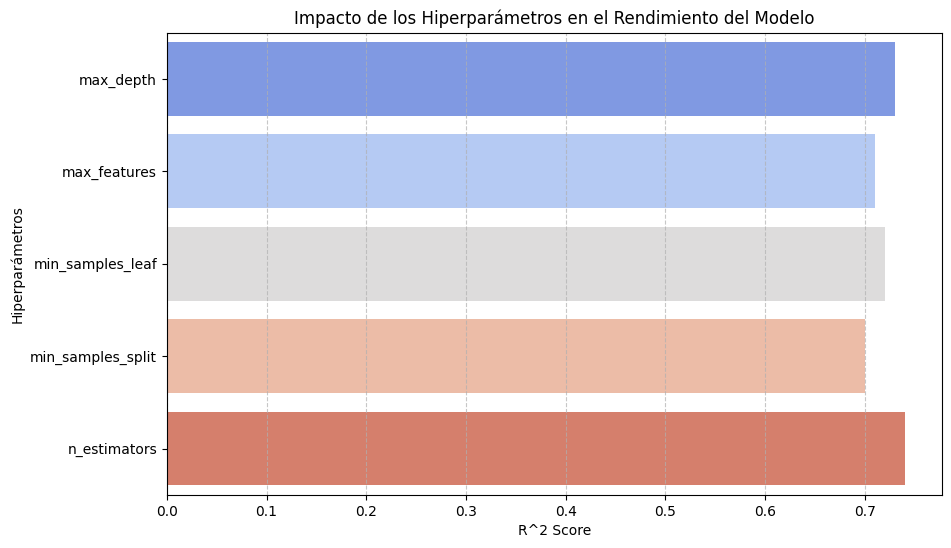

<ipython-input-16-b24ed1a03a54>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")


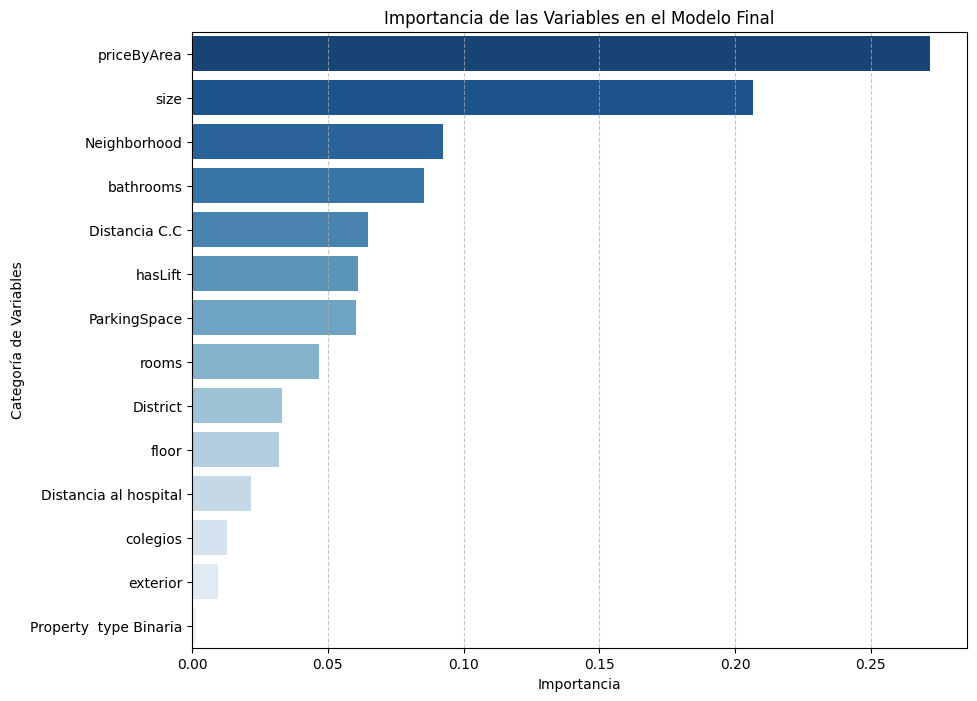

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Simulación de impacto de hiperparámetros en el rendimiento (valores de ejemplo)
hyperparams = ['max_depth', 'max_features', 'min_samples_leaf', 'min_samples_split', 'n_estimators']
scores = [0.73, 0.71, 0.72, 0.70, 0.74]  # Ejemplo de valores de R^2 obtenidos

# Gráfico del impacto de los hiperparámetros en el rendimiento
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=hyperparams, palette="coolwarm")
plt.xlabel("R^2 Score")
plt.ylabel("Hiperparámetros")
plt.title("Impacto de los Hiperparámetros en el Rendimiento del Modelo")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Gráfico de importancia de las variables agrupadas
importances = best_model.feature_importances_
feature_names = X.columns

# Agrupar por categoría
def categorize_feature(feature):
    if 'district' in feature:
        return 'District'
    elif 'neighborhood' in feature:
        return 'Neighborhood'
    else:
        return feature  # Mantener otras variables individuales

feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importances['category'] = feature_importances['feature'].apply(categorize_feature)
feature_importances_grouped = feature_importances.groupby('category', as_index=False)['importance'].sum()
feature_importances_grouped = feature_importances_grouped.sort_values(by='importance', ascending=False)

# Gráfico de importancia de las variables agrupadas
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")
plt.xlabel("Importancia")
plt.ylabel("Categoría de Variables")
plt.title("Importancia de las Variables en el Modelo Final")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


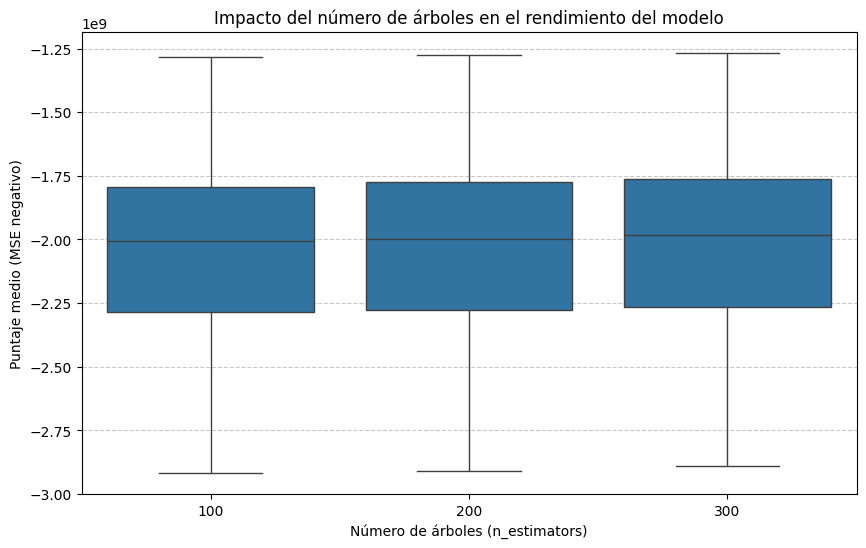

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129 (\x81) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


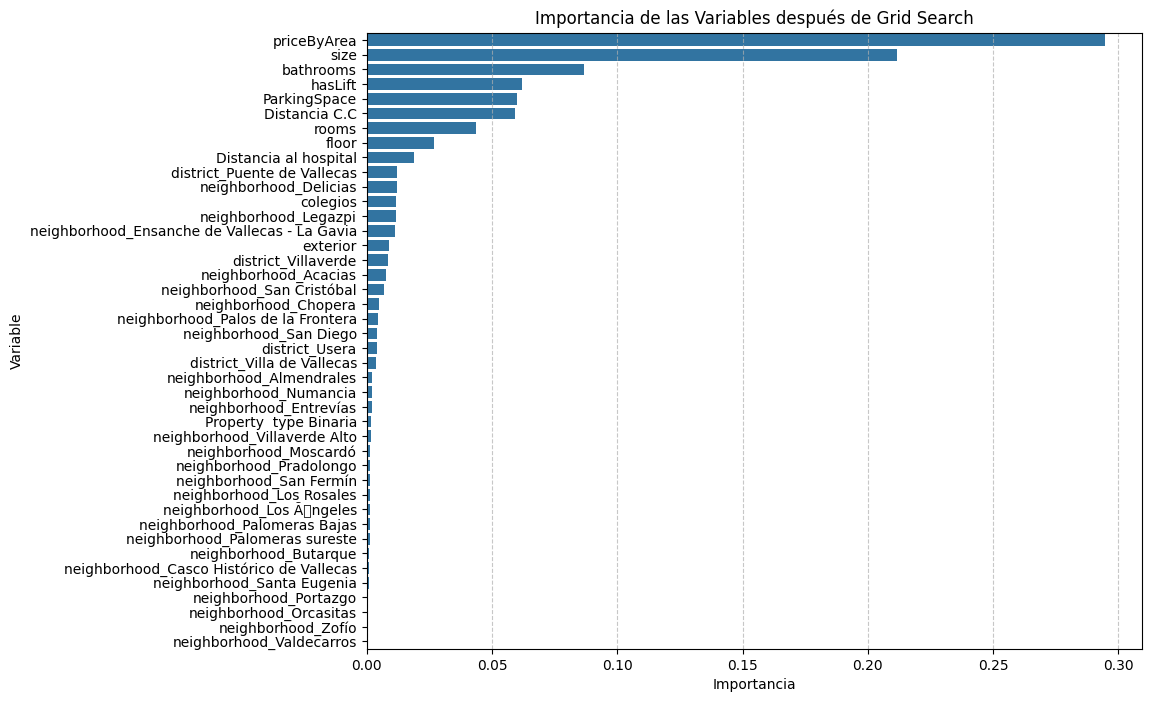

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraer resultados del Grid Search
cv_results = pd.DataFrame(grid_search.cv_results_)

# Gráfico de importancia de los hiperparámetros
plt.figure(figsize=(10, 6))
sns.boxplot(x='param_n_estimators', y='mean_test_score', data=cv_results)
plt.xlabel("Número de árboles (n_estimators)")
plt.ylabel("Puntaje medio (MSE negativo)")
plt.title("Impacto del número de árboles en el rendimiento del modelo")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Obtener la importancia de las variables del mejor modelo
feature_importances = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Gráfico de importancia de las variables
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables después de Grid Search")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


<ipython-input-13-f31b70e58d5a>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")


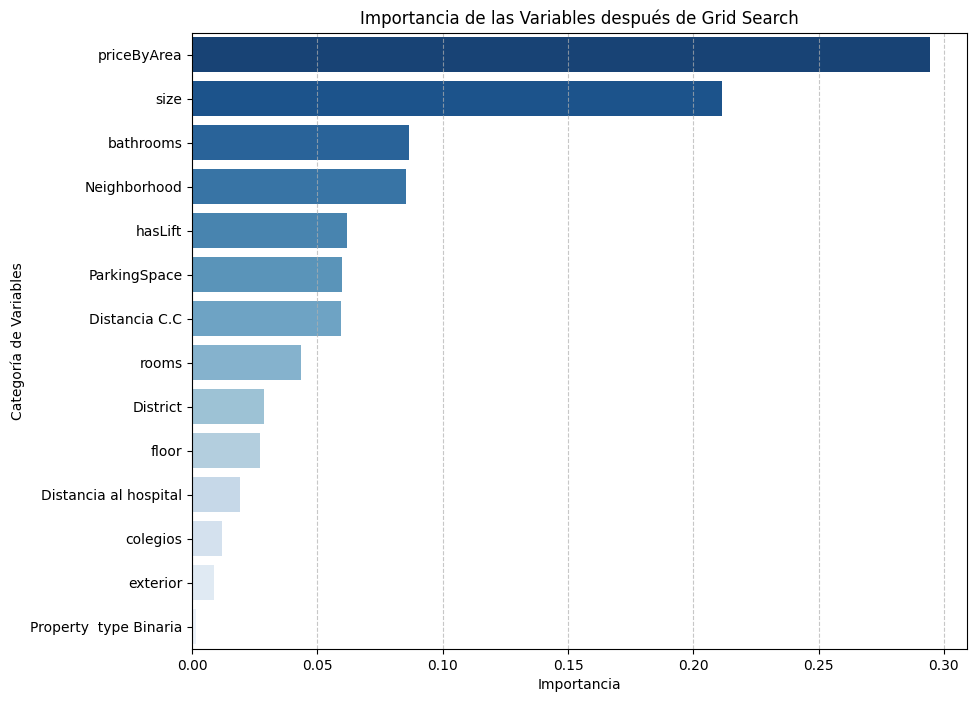

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener importancia de variables
importances = best_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para almacenar las importancias
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Función para clasificar las variables en categorías específicas
def categorize_feature(feature):
    if 'district' in feature:
        return 'District'
    elif 'neighborhood' in feature:
        return 'Neighborhood'
    else:
        return feature  # Mantener otras variables individuales

# Aplicar la categorización y agrupar por categoría
feature_importances['category'] = feature_importances['feature'].apply(categorize_feature)
feature_importances_grouped = feature_importances.groupby('category', as_index=False)['importance'].sum()

# Ordenar por importancia
feature_importances_grouped = feature_importances_grouped.sort_values(by='importance', ascending=False)

# Gráfico de importancia de las variables agrupadas
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")
plt.xlabel("Importancia")
plt.ylabel("Categoría de Variables")
plt.title("Importancia de las Variables después de Grid Search")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el modelo
rf = RandomForestRegressor(random_state=42)

# Definir los hiperparámetros para la búsqueda aleatoria
param_dist = {
    'n_estimators': randint(100, 500),  # Número de árboles
    'max_depth': [10, 20, 30, None],  # Profundidad máxima
    'min_samples_split': randint(2, 10),  # Muestras mínimas para dividir un nodo
    'min_samples_leaf': randint(1, 5),  # Muestras mínimas en una hoja
    'max_features': ['sqrt', 'log2'],  # Número máximo de características consideradas
    'bootstrap': [True, False]  # Muestreo con reemplazo
}

# Configurar RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Número de combinaciones a probar
    cv=5,  # Validación cruzada con 5 folds
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros encontrados:", random_search.best_params_)

# Evaluar el mejor modelo
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("RMSE:", rmse)
print("R^2:", r2)



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 256}
MAE: 23562.824112766473
RMSE: 35462.149774578895
R^2: 0.9041700908559482


<ipython-input-15-63e404711139>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")


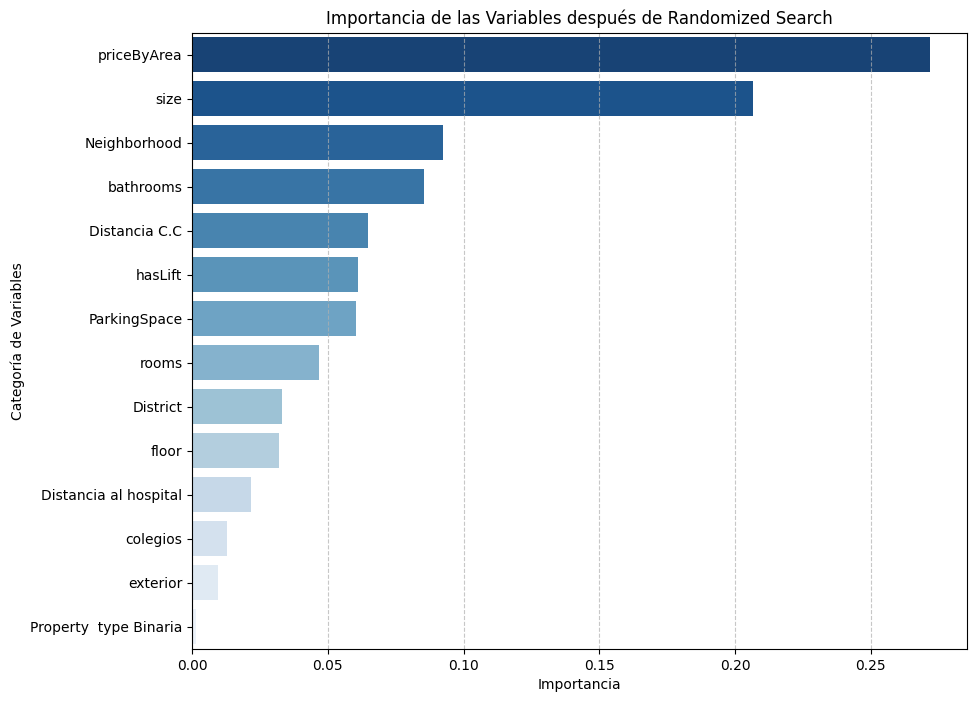

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Obtener la importancia de las variables
importances = best_model.feature_importances_
feature_names = X.columns

# Crear un DataFrame para almacenar las importancias
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Función para clasificar las variables en categorías específicas
def categorize_feature(feature):
    if 'district' in feature:
        return 'District'
    elif 'neighborhood' in feature:
        return 'Neighborhood'
    else:
        return feature  # Mantener otras variables individuales

# Aplicar la categorización y agrupar por categoría
feature_importances['category'] = feature_importances['feature'].apply(categorize_feature)
feature_importances_grouped = feature_importances.groupby('category', as_index=False)['importance'].sum()

# Ordenar por importancia
feature_importances_grouped = feature_importances_grouped.sort_values(by='importance', ascending=False)

# Gráfico de importancia de las variables agrupadas
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='category', data=feature_importances_grouped, palette="Blues_r")
plt.xlabel("Importancia")
plt.ylabel("Categoría de Variables")
plt.title("Importancia de las Variables después de Randomized Search")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo con los mejores parámetros obtenidos en GridSearchCV
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=3,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

# Evaluación con validación cruzada (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convertir los scores negativos en positivos
cv_scores = -cv_scores

# Calcular las métricas de evaluación de la validación cruzada
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Ajustar el modelo con los datos completos
rf.fit(X, y)

# Realizar predicciones sobre los datos de prueba
y_pred = rf.predict(X_test)

# Calcular las métricas de evaluación sobre el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

# Realizar predicciones sobre los datos de entrenamiento
y_train_pred = rf.predict(X_train)

# Calcular las métricas de evaluación sobre el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Mostrar los resultados
print("Validación cruzada:")


print("\nMétricas de Evaluación en el conjunto de prueba:")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

print("\nMétricas de Evaluación en el conjunto de entrenamiento:")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")


Validación cruzada:

Métricas de Evaluación en el conjunto de prueba:
MAE: 21448.026711042312
RMSE: 28950.900637389677
R²: 0.9361302649540291

Métricas de Evaluación en el conjunto de entrenamiento:
MAE: 21036.98641820914
RMSE: 28623.331463455394
R²: 0.9419634603840856


In [2]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir el modelo con los mejores parámetros obtenidos en GridSearchCV
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=False,
    random_state=42
)

# Evaluación con validación cruzada (5-fold)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Convertir los scores negativos en positivos
cv_scores = -cv_scores

# Calcular las métricas de evaluación de la validación cruzada
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Ajustar el modelo con los datos completos
rf.fit(X, y)

# Realizar predicciones sobre los datos de prueba
y_pred = rf.predict(X_test)

# Calcular las métricas de evaluación sobre el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)

# Realizar predicciones sobre los datos de entrenamiento
y_train_pred = rf.predict(X_train)

# Calcular las métricas de evaluación sobre el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Mostrar los resultados
print("Validación cruzada:")
print(f"Error cuadrático medio (MSE) promedio: {mean_cv_score}")
print(f"Desviación estándar del MSE: {std_cv_score}")

print("\nMétricas de Evaluación en el conjunto de prueba:")
print(f"MAE: {mae_test}")
print(f"RMSE: {rmse_test}")
print(f"R²: {r2_test}")

print("\nMétricas de Evaluación en el conjunto de entrenamiento:")
print(f"MAE: {mae_train}")
print(f"RMSE: {rmse_train}")
print(f"R²: {r2_train}")

Validación cruzada:
Error cuadrático medio (MSE) promedio: 6263511187.603414
Desviación estándar del MSE: 6803954489.389576

Métricas de Evaluación en el conjunto de prueba:
MAE: 22065.4499666606
RMSE: 29734.630589769084
R²: 0.9326254229744334

Métricas de Evaluación en el conjunto de entrenamiento:
MAE: 21367.43505334839
RMSE: 29233.38238095441
R²: 0.9394632244196768


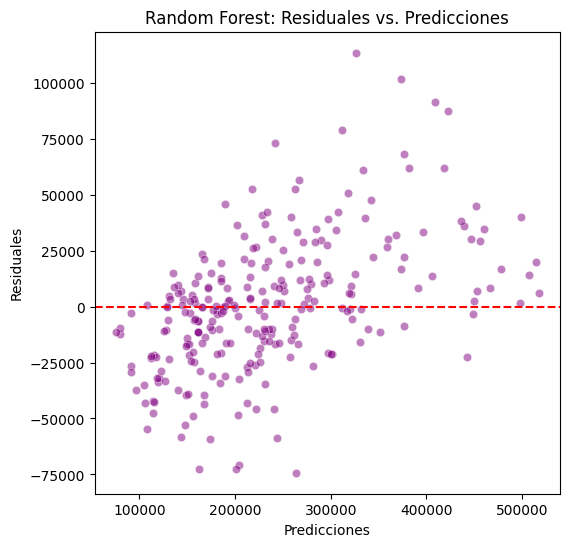

In [5]:
residuals = y_test - rf.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=rf.predict(X_test), y=residuals, color="purple", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.xlabel("Predicciones")
plt.ylabel("Residuales")
plt.title("Random Forest: Residuales vs. Predicciones")
plt.show()

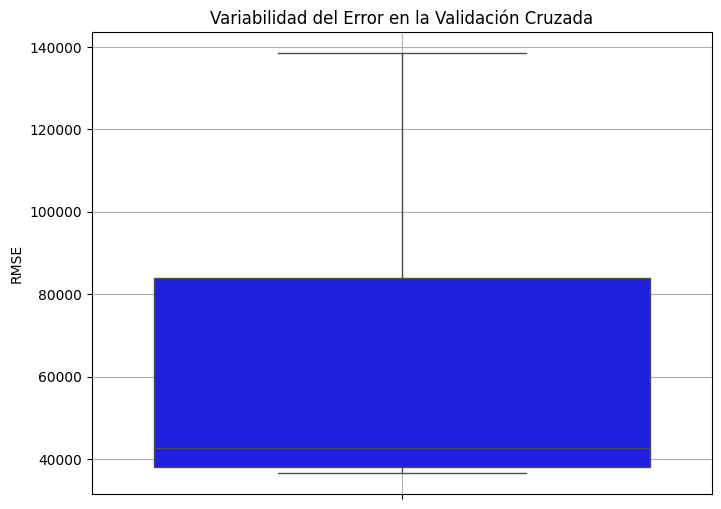

In [6]:
from sklearn.model_selection import cross_val_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluación con validación cruzada
mse_scores = -cross_val_score(rf, X, y, cv=5, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(mse_scores)

# Gráfico de Boxplot del RMSE
plt.figure(figsize=(8, 6))
sns.boxplot(y=rmse_scores, color='blue')
plt.ylabel("RMSE")
plt.title("Variabilidad del Error en la Validación Cruzada")
plt.grid()
plt.show()


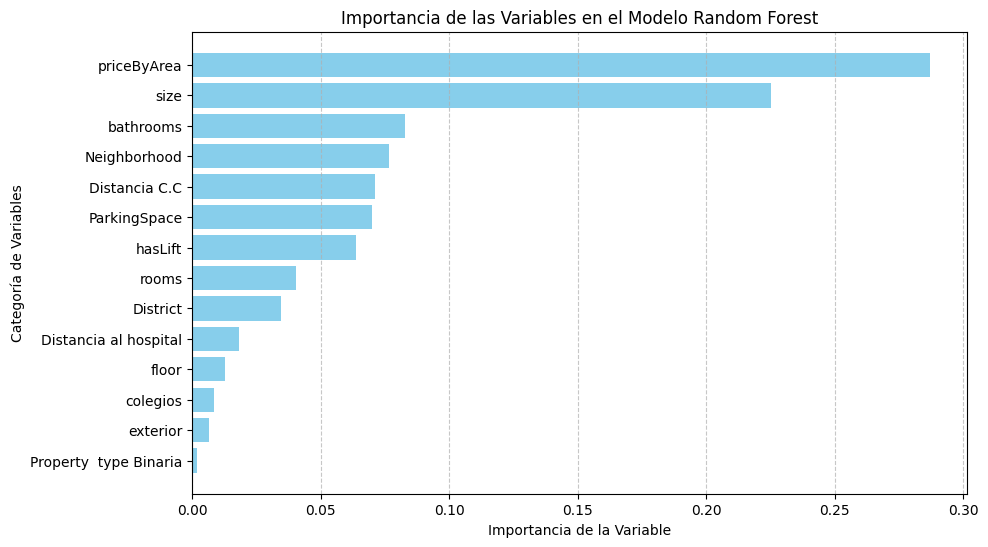

In [7]:
from collections import defaultdict

# Obtener importancia de las variables
importances = rf.feature_importances_
feature_names = X.columns

# Agrupar por tipo de variable
importance_dict = defaultdict(float)
for feature, importance in zip(feature_names, importances):
    if 'district' in feature:
        base_feature = 'District'
    elif 'neighborhood' in feature:
        base_feature = 'Neighborhood'
    else:
        base_feature = feature.split('_')[0]
    importance_dict[base_feature] += importance

# Ordenar por importancia
sorted_importances = sorted(importance_dict.items(), key=lambda x: x[1])
labels, values = zip(*sorted_importances)

# Gráfico de importancia de variables
plt.figure(figsize=(10, 6))
plt.barh(labels, values, color='skyblue')
plt.xlabel("Importancia de la Variable")
plt.ylabel("Categoría de Variables")
plt.title("Importancia de las Variables en el Modelo Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


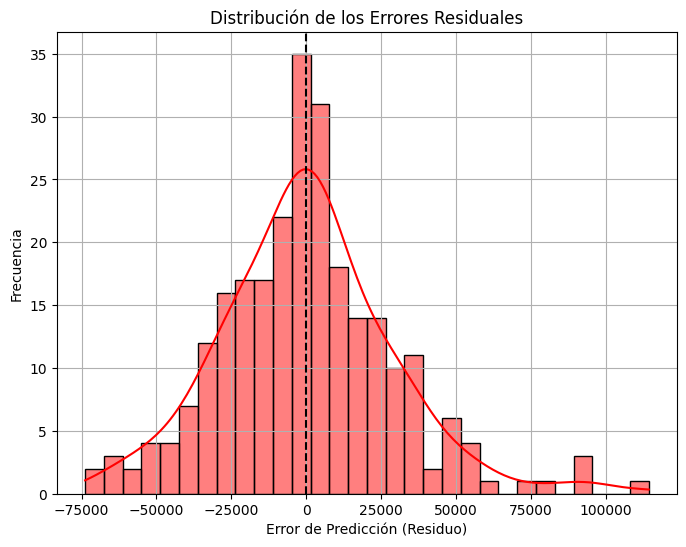

In [10]:
import seaborn as sns

# Calcular errores residuales
errores = y_test - y_pred

# Gráfico de distribución de los errores
plt.figure(figsize=(8, 6))
sns.histplot(errores, bins=30, kde=True, color='red')
plt.axvline(0, color='black', linestyle='dashed')
plt.xlabel("Error de Predicción (Residuo)")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores Residuales")
plt.grid()
plt.show()


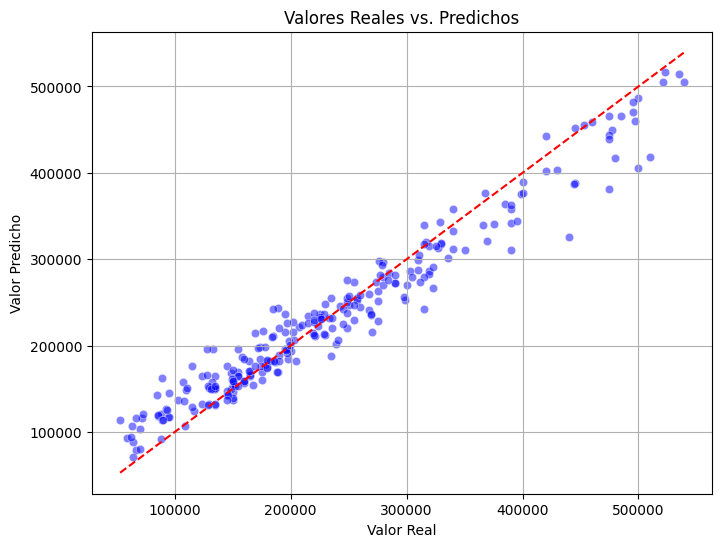

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="dashed", color="red")
plt.xlabel("Valor Real")
plt.ylabel("Valor Predicho")
plt.title("Valores Reales vs. Predichos")
plt.grid()
plt.show()


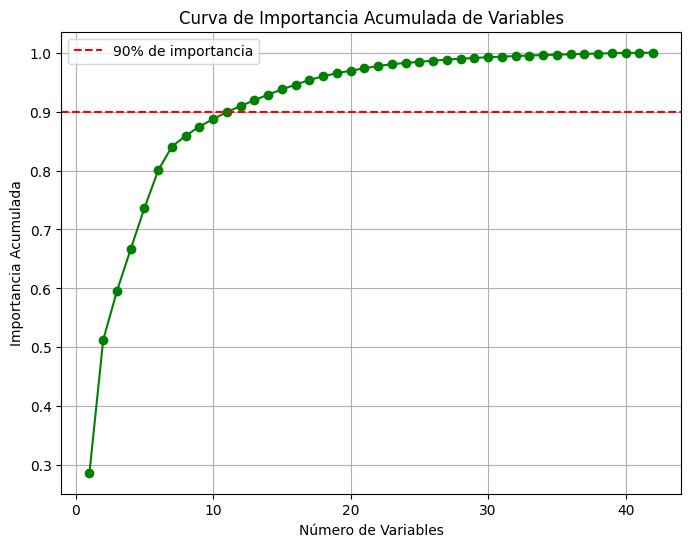

In [12]:
import numpy as np

# Ordenar las importancias en orden descendente
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = np.cumsum(importances[sorted_idx])

# Gráfico de importancia acumulada
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(importances) + 1), sorted_importances, marker="o", linestyle="-", color="green")
plt.xlabel("Número de Variables")
plt.ylabel("Importancia Acumulada")
plt.title("Curva de Importancia Acumulada de Variables")
plt.axhline(y=0.9, color="r", linestyle="dashed", label="90% de importancia")
plt.legend()
plt.grid()
plt.show()


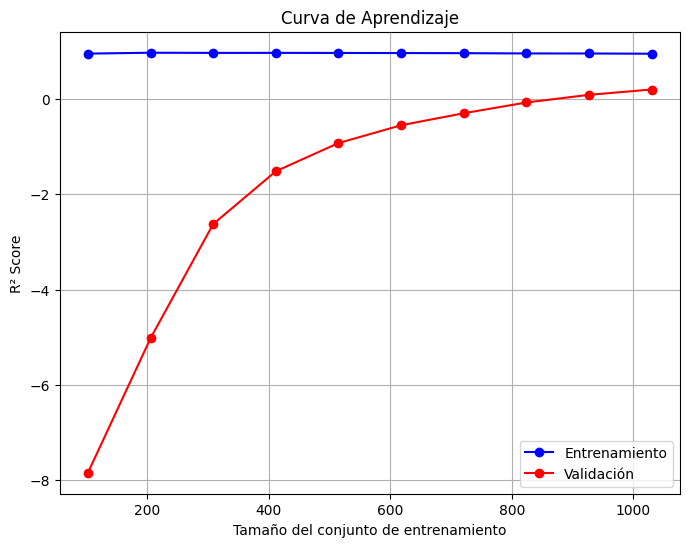

In [13]:
from sklearn.model_selection import learning_curve

# Obtener curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    rf, X, y, cv=5, scoring="r2", train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calcular medias y desviaciones
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Graficar curva de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Entrenamiento", color="blue", marker="o")
plt.plot(train_sizes, test_mean, label="Validación", color="red", marker="o")
plt.xlabel("Tamaño del conjunto de entrenamiento")
plt.ylabel("R² Score")
plt.title("Curva de Aprendizaje")
plt.legend()
plt.grid()
plt.show()


GRAFICOS REGRESION LINEAL


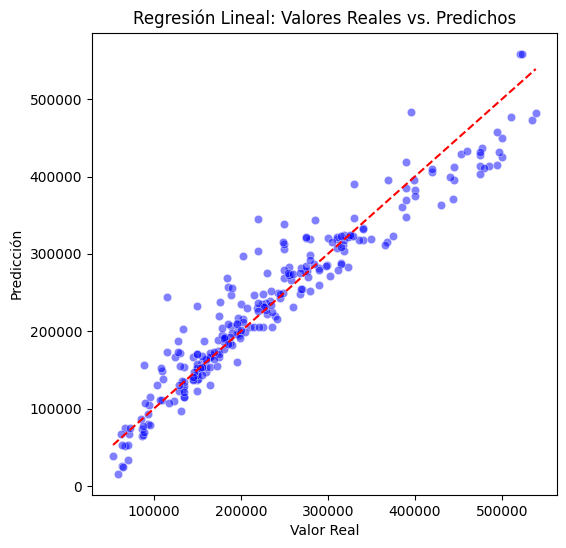

In [20]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=model.predict(X_test), color="blue", alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle="dashed", color="red")
plt.xlabel("Valor Real")
plt.ylabel("Predicción")
plt.title("Regresión Lineal: Valores Reales vs. Predichos")
plt.show()


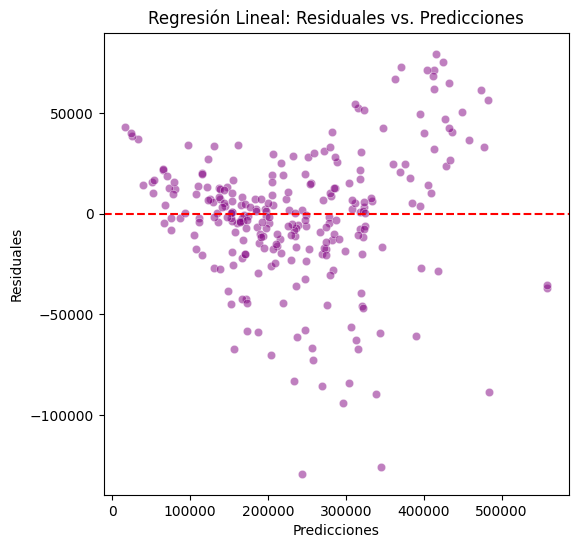

In [21]:
residuals = y_test - model.predict(X_test)

plt.figure(figsize=(6, 6))
sns.scatterplot(x=model.predict(X_test), y=residuals, color="purple", alpha=0.5)
plt.axhline(y=0, color="red", linestyle="dashed")
plt.xlabel("Predicciones")
plt.ylabel("Residuales")
plt.title("Regresión Lineal: Residuales vs. Predicciones")
plt.show()


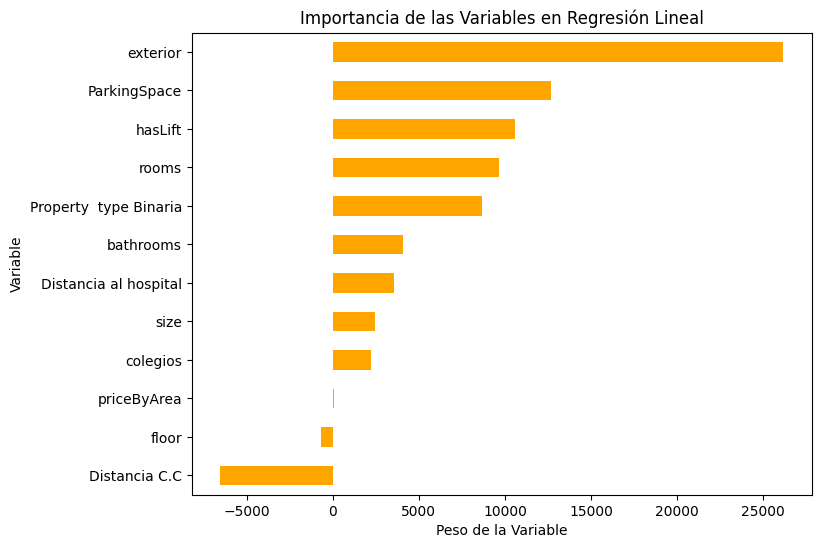

In [22]:
importances = pd.Series(model.coef_, index=X_train.columns).sort_values()

plt.figure(figsize=(8, 6))
importances.plot(kind="barh", color="orange")
plt.xlabel("Peso de la Variable")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en Regresión Lineal")
plt.show()


In [7]:
mae_percentage = (mae / y_test.mean()) * 100
rmse_percentage = (rmse / y_test.mean()) * 100
print(f"MAE en porcentaje: {mae_percentage:.2f}%")
print(f"RMSE en porcentaje: {rmse_percentage:.2f}%")

MAE en porcentaje: 10.01%
RMSE en porcentaje: 14.13%


In [8]:
mae_percentage = (mae / (y_test.max() - y_test.min())) * 100
rmse_percentage = (rmse / (y_test.max() - y_test.min())) * 100
print(f"MAE en porcentaje: {mae_percentage:.2f}%")
print(f"RMSE en porcentaje: {rmse_percentage:.2f}%")

MAE en porcentaje: 4.84%
RMSE en porcentaje: 6.84%
